# XGBoost:

### Phase 1: Foundational Concepts

#### 1.1 What is Boosting?
Boosting is a sequential ensemble learning technique that combines multiple weak learners (often decision trees) to create a strong learner. The key idea is:

        1. Train a weak model.
        2. Identify where it made mistakes.
        3. Train a new weak model that focuses on fixing those mistakes.
        4. Repeat this process to improve accuracy.



#### 1.2 Why is Boosting Powerful?

Unlike other ensemble methods (like bagging or random forests), boosting:

    ✔ Reduces bias (makes models more flexible).
    ✔ Can handle both regression and classification tasks.
    ✔ Is highly effective in tabular data problems (e.g., Kaggle competitions).

#### 1.3 How Does Boosting Work? (Intuitive Step-by-Step)

Let’s say we want to predict house prices based on features like square footage, location, etc.

    1️⃣ Train a simple model (Weak Model 1).
    2️⃣ This model makes some errors (underpredicts for expensive houses).
    3️⃣ Train a second model to correct these errors.
    4️⃣ Combine the two models for better predictions.
5️⃣ Repeat until we achieve good accuracy.

#### 1.4 Boosting vs. Other Ensemble Methods

![Difference](images/boost.png)

#### 1.5 Types of Boosting Algorithms

    ✅ AdaBoost (Adaptive Boosting) – Adjusts sample weights.
    ✅ Gradient Boosting (GBM) – Uses gradient descent.
    ✅ XGBoost (eXtreme Gradient Boosting) – Optimized gradient boosting with regularization.

#### 2.1 What is Gradient Boosting?

Gradient Boosting is a boosting technique that builds models sequentially, where each new model reduces the error of the previous one by minimizing a loss function using gradient descent.

👉 Key Idea:
    Instead of assigning weights like AdaBoost, Gradient Boosting fits a new model on the residuals (errors) of the previous model. It improves predictions by following the gradient of the loss function.

#### 2.2 Step-by-Step Intuition

Let's break it down step by step with a simple regression example.

**Step 1: Start with a weak model**

We begin with a simple model, often a single decision tree (called a stump).
This model predicts a constant value (e.g., the mean of all target values in regression).
It makes errors, called residuals (actual - predicted).

**Step 2: Compute Residuals**

Now, we calculate the difference between actual values and predicted values.
If our model predicted 200k for a house price, but the actual price is 250k, the residual is 50k.
If the actual price was 180k, the residual is -20k.

**Step 3: Fit a New Model on Residuals**

The second model learns from the mistakes of the first model by predicting the residuals instead of the actual values.
The goal of this model is to reduce the error made by the first model.

**Step 4: Combine Models**

We add the new model’s predictions to the previous model’s predictions.
The updated predictions are now more accurate.

**Step 5: Repeat Until Convergence**

We keep repeating this process until we reach a stopping criterion (e.g., a small error or a set number of iterations).


#### 2.3 Why Use Gradients?

In gradient boosting, we optimize the model by minimizing the loss function using gradient descent.

If loss is large, we take a step in the negative gradient direction to reduce it.

This allows the algorithm to learn more efficiently.

#### Step 3: Implementing Gradient Boosting from Scratch in Python

Now, let’s implement a simple version of gradient boosting from scratch using only NumPy and Python, without any libraries like XGBoost or Scikit-learn.

We’ll start with a basic gradient boosting regressor for a simple regression problem.

#### 3.1 Plan for Our Implementation

We will:

1️⃣ Generate sample data (X, y).

2️⃣ Initialize a base prediction (mean of y).

3️⃣ Train multiple small decision trees (stumps) to predict residuals.

4️⃣ Update predictions by adding each new tree’s predictions.

5️⃣ Use a learning rate to control updates.

6️⃣ Repeat the process for multiple iterations.

#### 3.2 Code Implementation

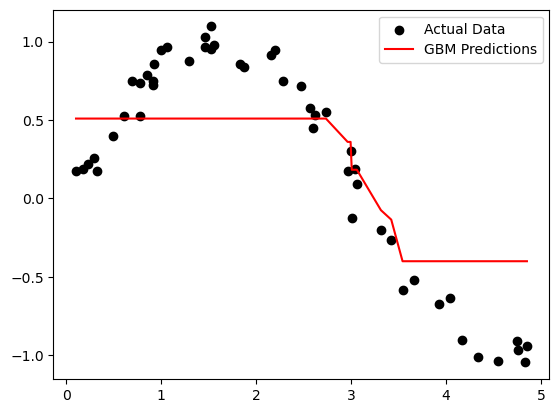

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data for testing
np.random.seed(42)
X = np.sort(5 * np.random.rand(50, 1), axis=0)  # Feature matrix (50 samples, 1 feature)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # Target variable with noise

# Decision Stump (Weak Learner)
class DecisionStump:
    def __init__(self):
        self.threshold = None
        self.left_value = None
        self.right_value = None

    def fit(self, X, y):
        """ Find the best split and fit the stump to minimize residuals """
        best_loss = float('inf')

        for i in range(len(X)):
            threshold = X[i, 0]  # Convert X to scalar threshold
            left_mask = X.ravel() <= threshold
            right_mask = X.ravel() > threshold

            left_value = np.mean(y[left_mask]) if np.any(left_mask) else 0
            right_value = np.mean(y[right_mask]) if np.any(right_mask) else 0

            # Compute loss (Mean Squared Error)
            loss = np.sum((y[left_mask] - left_value) ** 2) + np.sum((y[right_mask] - right_value) ** 2)

            if loss < best_loss:
                best_loss = loss
                self.threshold = threshold
                self.left_value = left_value
                self.right_value = right_value

    def predict(self, X):
        """ Predict values based on the threshold """
        return np.where(X.ravel() <= self.threshold, self.left_value, self.right_value)

# Gradient Boosting Regressor
class GradientBoostingRegressor:
    def __init__(self, n_estimators=50, learning_rate=0.1):
        self.n_estimators = n_estimators  # Number of weak learners
        self.learning_rate = learning_rate  # Step size
        self.models = []  # Store trained trees
        self.F = None  # Store predictions

    def fit(self, X, y):
        """ Train gradient boosting model """
        # Step 1: Initialize model with mean prediction
        self.F = np.full(y.shape, np.mean(y))

        for _ in range(self.n_estimators):
            # Step 2: Compute residuals (Negative Gradient)
            residuals = y - self.F

            # Step 3: Train a weak learner (stump) on residuals
            stump = DecisionStump()
            stump.fit(X, residuals)
            self.models.append(stump)

            # Step 4: Update the model predictions
            self.F += self.learning_rate * stump.predict(X).ravel()  # Ensure shape consistency

    def predict(self, X):
        """ Generate final predictions """
        predictions = np.full(X.shape[0], np.mean(y))  # Start with base prediction
        for stump in self.models:
            predictions += self.learning_rate * stump.predict(X).ravel()
        return predictions

# Train Gradient Boosting Model
gbm = GradientBoostingRegressor(n_estimators=10, learning_rate=0.1)
gbm.fit(X, y)

# Make Predictions
predictions = gbm.predict(X)

# Plot Results
plt.scatter(X, y, color="black", label="Actual Data")
plt.plot(X, predictions, color="red", label="GBM Predictions")
plt.legend()
plt.show()
